In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
batch_size = 64

In [12]:
!cp -r /floyd/input/clabby /floyd/home/fastai/data/cousins

In [13]:
path = Path('/floyd/home/fastai/data/cousins')

In [15]:
path.ls()

[PosixPath('/floyd/home/fastai/data/cousins/brian'),
 PosixPath('/floyd/home/fastai/data/cousins/peter'),
 PosixPath('/floyd/home/fastai/data/cousins/charlie'),
 PosixPath('/floyd/home/fastai/data/cousins/michael'),
 PosixPath('/floyd/home/fastai/data/cousins/luke'),
 PosixPath('/floyd/home/fastai/data/cousins/jimmy'),
 PosixPath('/floyd/home/fastai/data/cousins/jack')]

In [28]:
import os
for folder in path.ls():
    i = 1
    label = str(folder).split('/')[-1]
    for photo in folder.ls():
        new_name = f'{str(folder)}/{label}_{i}.png'
        os.rename(photo, new_name)
        i = i + 1

In [29]:
fnames = sorted(Path('/floyd/home/fastai/data/cousins').glob('**/*.png'))

In [30]:
len(fnames)

431

In [31]:
np.random.seed(2)

In [32]:
pat = r'([^/]+)_\d+.png'

In [36]:
import re
p = re.compile(pat)
m = p.search('/floyd/input/fastai/data/cousins/charlie/charlie_15.png').group(1)
print(m)

charlie


In [37]:
path_img = Path('/floyd/home/fastai/data/cousins')

In [38]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=batch_size)

In [39]:
data.normalize(imagenet_stats)

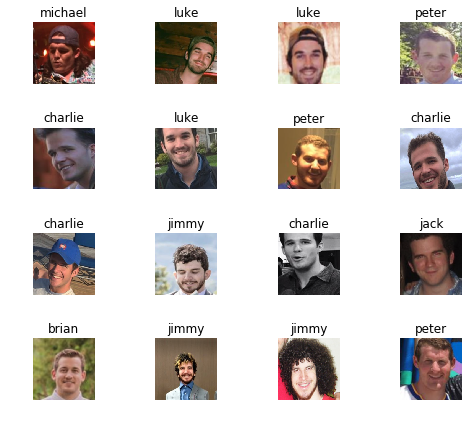

In [40]:
data.show_batch(rows=4, figsize=(7,6))

In [41]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [42]:
learn.fit_one_cycle(4)

Total time: 00:23
epoch  train_loss  valid_loss  error_rate
1      2.380680    1.992091    0.833333    (00:08)
2      1.913791    1.618649    0.619048    (00:05)
3      1.542743    1.463941    0.500000    (00:04)
4      1.325017    1.446773    0.428571    (00:04)



In [43]:
learn.save('stage-1')

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

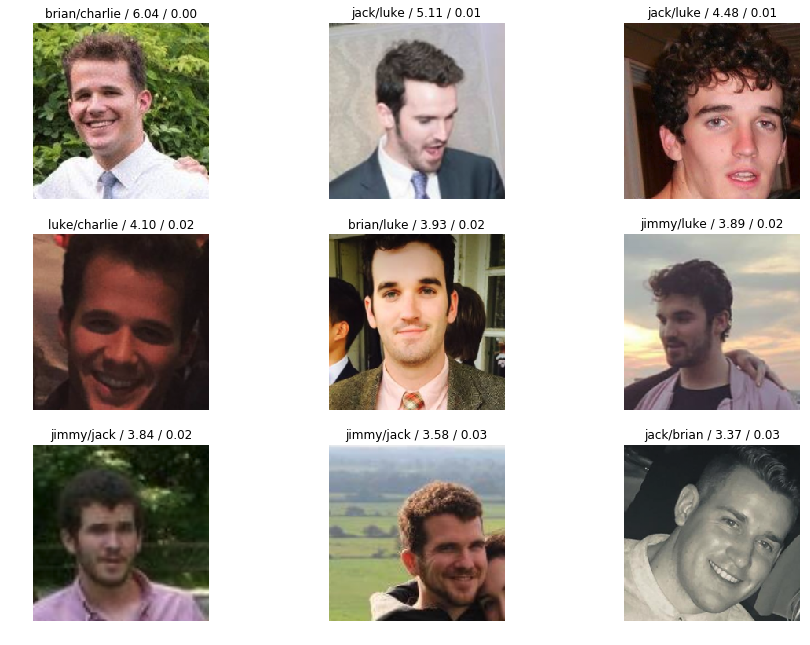

In [45]:
interp.plot_top_losses(9, figsize=(15, 11))

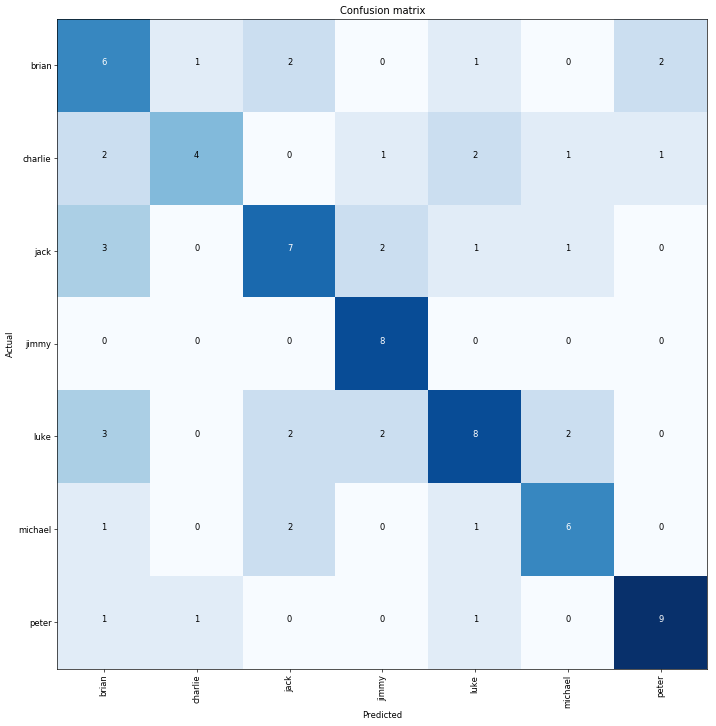

In [46]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [48]:
interp.most_confused(min_val=1)

[('jack', 'brian', 3),
 ('luke', 'brian', 3),
 ('brian', 'jack', 2),
 ('brian', 'peter', 2),
 ('charlie', 'brian', 2),
 ('charlie', 'luke', 2),
 ('jack', 'jimmy', 2),
 ('luke', 'jack', 2),
 ('luke', 'jimmy', 2),
 ('luke', 'michael', 2),
 ('michael', 'jack', 2)]

In [49]:
learn.unfreeze()

In [50]:
learn.fit_one_cycle(1)

Total time: 00:07
epoch  train_loss  valid_loss  error_rate
1      1.021664    1.519493    0.511905    (00:07)



In [51]:
learn.load('stage-1')

In [52]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


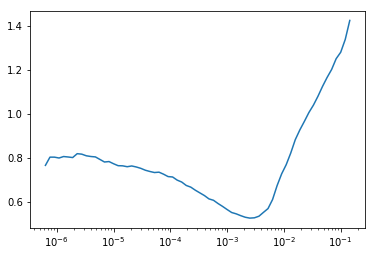

In [53]:
learn.recorder.plot()

In [54]:
learn.unfreeze()

In [56]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-2))

Total time: 01:00
epoch  train_loss  valid_loss  error_rate
1      0.447588    1.783108    0.392857    (00:06)
2      0.365387    1.443650    0.297619    (00:05)
3      0.338020    4.143060    0.500000    (00:05)
4      0.396351    5.772768    0.595238    (00:05)
5      0.447615    5.755869    0.488095    (00:06)
6      0.447039    2.739708    0.357143    (00:05)
7      0.409679    1.717982    0.297619    (00:06)
8      0.376491    1.321090    0.297619    (00:06)
9      0.334819    0.940126    0.238095    (00:06)
10     0.295249    0.824934    0.226190    (00:06)



In [57]:
learn.save('stage-2')

In [58]:
interp2 = ClassificationInterpretation.from_learner(learn)

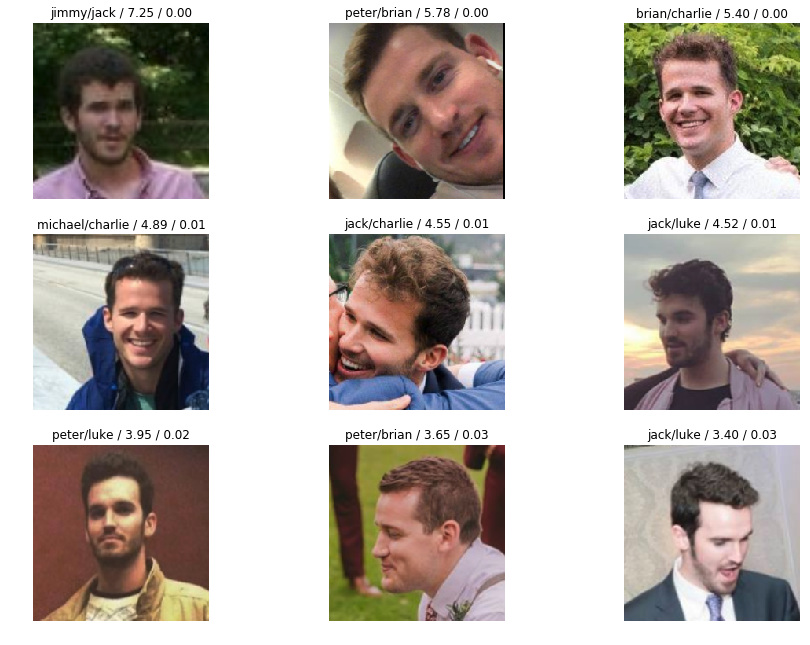

In [59]:
interp2.plot_top_losses(9, figsize=(15,11))

In [61]:
interp.most_confused(min_val=1)

[('jack', 'brian', 3),
 ('luke', 'brian', 3),
 ('brian', 'jack', 2),
 ('brian', 'peter', 2),
 ('charlie', 'brian', 2),
 ('charlie', 'luke', 2),
 ('jack', 'jimmy', 2),
 ('luke', 'jack', 2),
 ('luke', 'jimmy', 2),
 ('luke', 'michael', 2),
 ('michael', 'jack', 2)]

In [63]:
data50 = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=batch_size//2)

In [64]:
learn50 = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 68249288.91it/s]


In [67]:
learn50.fit_one_cycle(8)

Total time: 01:16
epoch  train_loss  valid_loss  error_rate
1      2.178799    1.865529    0.714286    (00:18)
2      1.610445    1.554744    0.511905    (00:08)
3      1.284222    1.418198    0.464286    (00:08)
4      1.028219    1.399647    0.464286    (00:08)
5      0.843470    1.403809    0.464286    (00:08)
6      0.713925    1.340221    0.369048    (00:08)
7      0.616957    1.268981    0.369048    (00:08)
8      0.546959    1.265905    0.380952    (00:08)



In [68]:
learn50.save('stage-1-50')